In [1]:
from ema_workbench import load_results
from ema_workbench.analysis import pairs_plotting
import matplotlib.pyplot as plt
from ema_workbench.analysis import feature_scoring
import seaborn as sns
from ema_workbench.analysis import prim
import pandas as pd
from SALib.analyze import sobol
from ema_workbench import Samplers
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench import Model, RealParameter, ScalarOutcome
from ema_workbench import MultiprocessingEvaluator, ema_logging

from ema_workbench import save_results

## Lijstje van analysis methodes

- Summarizing values such as mean, var, max, min
- Boxplots
- Feature scoring
- Scenario analysis
- Sobol indices

### Run 10 points 10 scenarios

In [2]:
results = load_results('../results/first_run_allpoints_140scenarios.gz')

In [3]:
experiments, outcomes = results

In [10]:
outcomes

{'num_of_nodes': array([3201, 3042, 3067, 3107, 2917, 2891, 2801, 2761, 2931, 2871],
       dtype=int64),
 'num_of_edges': array([3384, 3206, 3231, 3276, 3088, 3055, 2970, 2922, 3094, 3040],
       dtype=int64),
 'continuity_mean': array([58.2617284 , 57.1308642 , 56.02469136, 57.80740741, 54.21481481,
        56.12839506, 52.84444444, 54.40740741, 56.48888889, 58.12098765]),
 'continuity_vars': array([609.95618961, 566.97793629, 558.16729157, 583.10364883,
        448.46002743, 524.9069715 , 425.47950617, 452.52290809,
        553.12888889, 606.14091754]),
 'connectivity_mean': array([44., 44., 44., 44., 44., 44., 44., 44., 44., 44.]),
 'connectivity_vars': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'degree_centrality_mean': array([0.00552105, 0.00575391, 0.00571413, 0.00564444, 0.00594314,
        0.00604179, 0.00624381, 0.0063747 , 0.00592154, 0.00606088]),
 'degree_centrality_var': array([1.27276295e-06, 1.40002946e-06, 1.34842907e-06, 1.32354731e-06,
        1.46780042e-06,

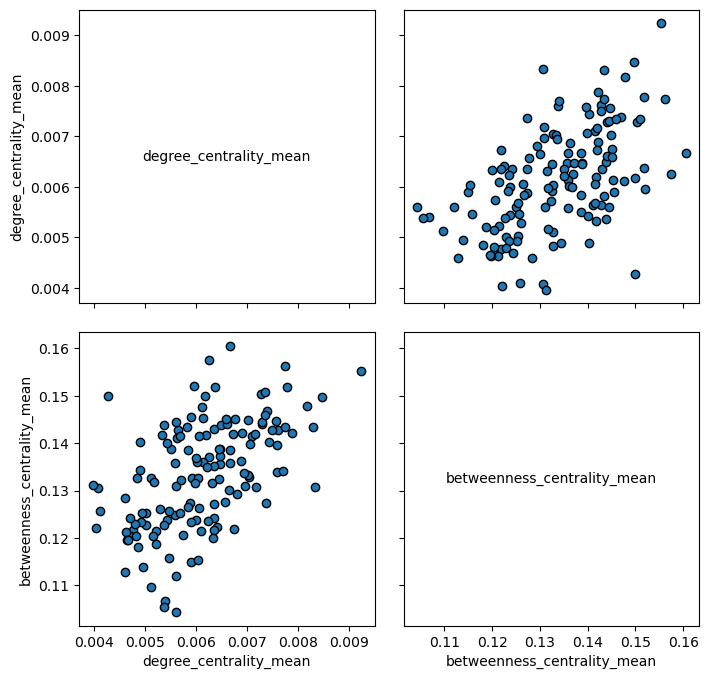

In [35]:
fig, axes = pairs_plotting.pairs_scatter(experiments, {k: outcomes[k] for k in ('degree_centrality_mean', 'betweenness_centrality_mean')}, legend=False)
fig.set_size_inches(8, 8)

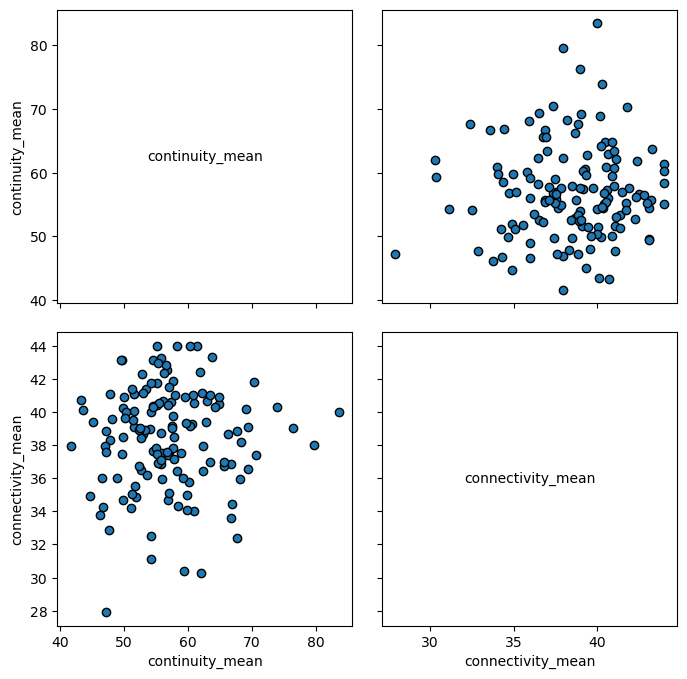

In [34]:
fig, axes = pairs_plotting.pairs_scatter(experiments, {k: outcomes[k] for k in ('continuity_mean', 'connectivity_mean')}, legend=False)
fig.set_size_inches(8, 8)

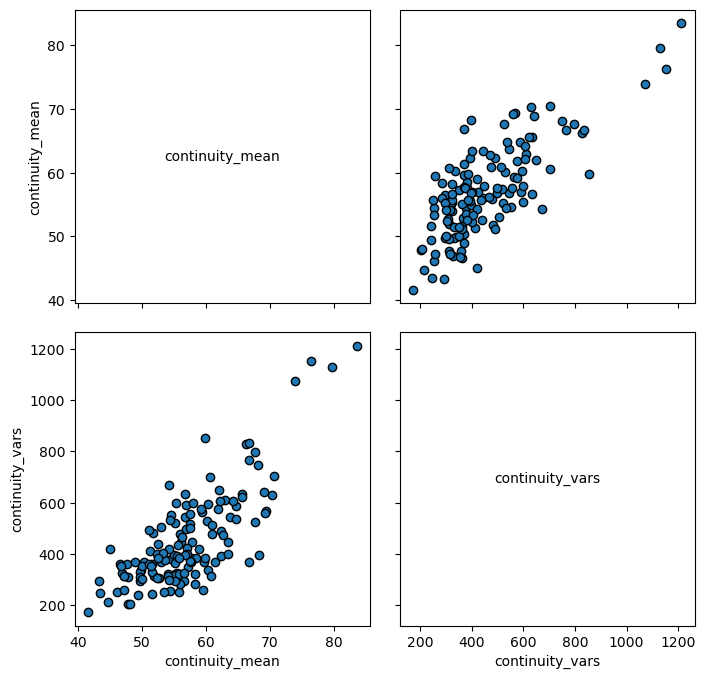

In [33]:
fig, axes = pairs_plotting.pairs_scatter(experiments, {k: outcomes[k] for k in ('continuity_mean', 'continuity_vars')}, legend=False)
fig.set_size_inches(8, 8)

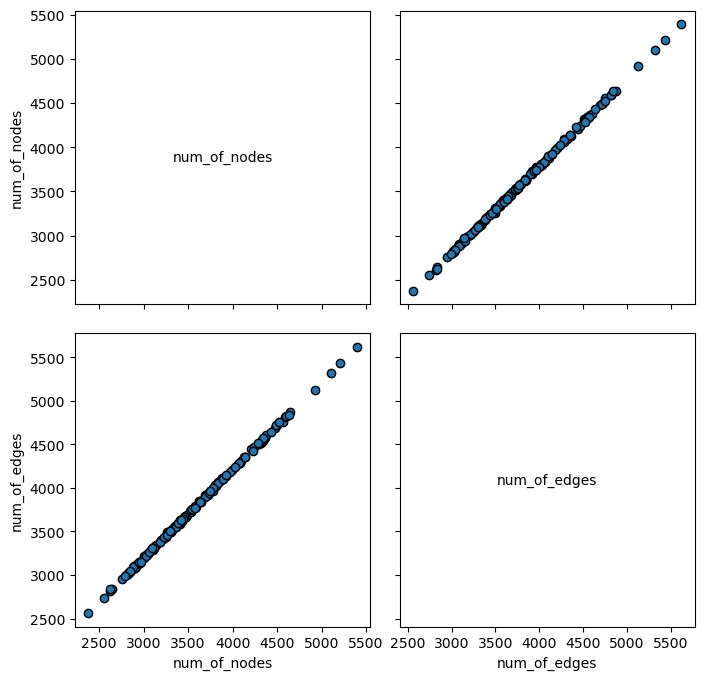

In [4]:
fig, axes = pairs_plotting.pairs_scatter(experiments, {k: outcomes[k] for k in ('num_of_nodes', 'num_of_edges')}, legend=False)
fig.set_size_inches(8, 8)

<AxesSubplot:ylabel='0'>

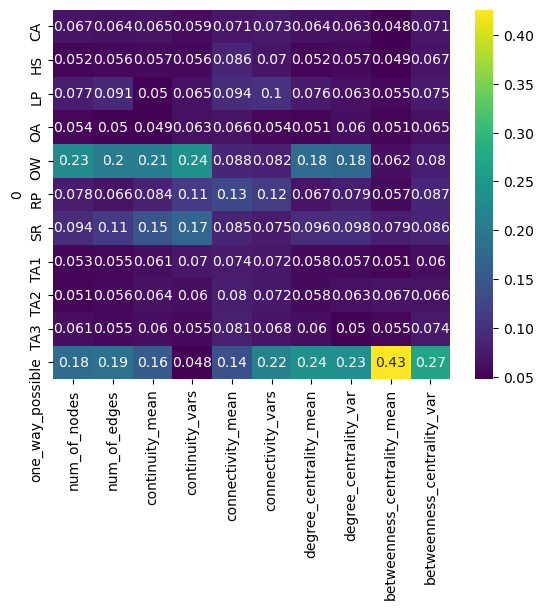

In [5]:


fs = feature_scoring.get_feature_scores_all(experiments, outcomes)
sns.heatmap(fs, cmap="viridis", annot=True)

# Run 140 scenarios

In [7]:
experiments, outcomes =  load_results('../results/first_run_10points_64scenarios.gz')

In [36]:
outcomes.keys()

dict_keys(['num_of_nodes', 'num_of_edges', 'continuity_mean', 'continuity_vars', 'connectivity_mean', 'connectivity_vars', 'degree_centrality_mean', 'degree_centrality_var', 'betweenness_centrality_mean', 'betweenness_centrality_var'])

## Boxplot van outcomes

In [7]:
outcomes_list = []
for key in outcomes.keys():
    outcomes_list.append(outcomes[key])

[Text(1, 0, 'num_of_nodes'), Text(2, 0, 'num_of_edges')]

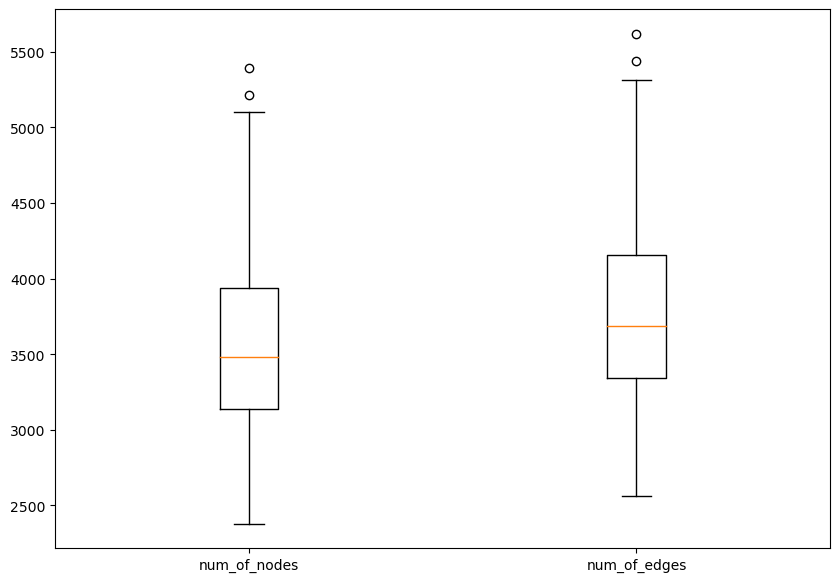

In [8]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
plt.boxplot(outcomes_list[:2])

ax.set_xticklabels(['num_of_nodes', 'num_of_edges'])

[Text(1, 0, 'connectivity_mean')]

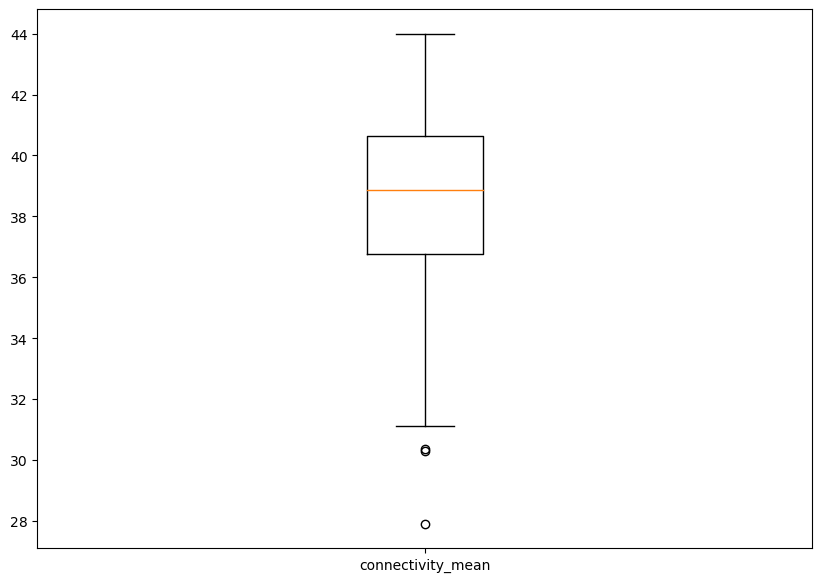

In [9]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
plt.boxplot(outcomes_list[4:5])

ax.set_xticklabels(list(outcomes.keys())[4:5])

## Statistical values of outcomes

In [10]:
stats_df = pd.DataFrame()
for key in list(outcomes.keys()):
    df = pd.DataFrame(outcomes[key])
    stats_df[key] = df.describe()

In [11]:
stats_df

,num_of_nodes,num_of_edges,continuity_mean,continuity_vars,connectivity_mean,connectivity_vars,degree_centrality_mean,degree_centrality_var,betweenness_centrality_mean,betweenness_centrality_var
count,140.000000,140.00000,140.000000,140.000000,140.000000,140.000000,140.000000,1.400000e+02,140.000000,140.000000
mean,3584.985714,3790.40000,56.947928,450.786258,38.480173,85.775758,0.006124,1.486815e-06,0.133366,0.016319
std,588.044057,596.03196,7.294225,185.820479,3.058264,36.043861,0.001031,6.848857e-07,0.011525,0.002029
min,2379.000000,2561.00000,41.648889,171.561165,27.911111,0.000000,0.003969,4.204555e-07,0.104347,0.011007
25%,3137.250000,3340.00000,52.224444,322.455299,36.760000,63.466943,0.005392,9.848108e-07,0.124051,0.015138
50%,3482.000000,3684.00000,55.998889,394.275990,38.877778,88.986262,0.006078,1.356157e-06,0.133473,0.016481
75%,3939.000000,4156.25000,60.818889,543.522207,40.632222,112.962469,0.006771,1.805165e-06,0.142324,0.017651
max,5394.000000,5620.00000,83.546667,1213.385600,44.000000,162.872099,0.009240,3.985305e-06,0.160549,0.021288


## Feature scoring

<AxesSubplot:ylabel='0'>

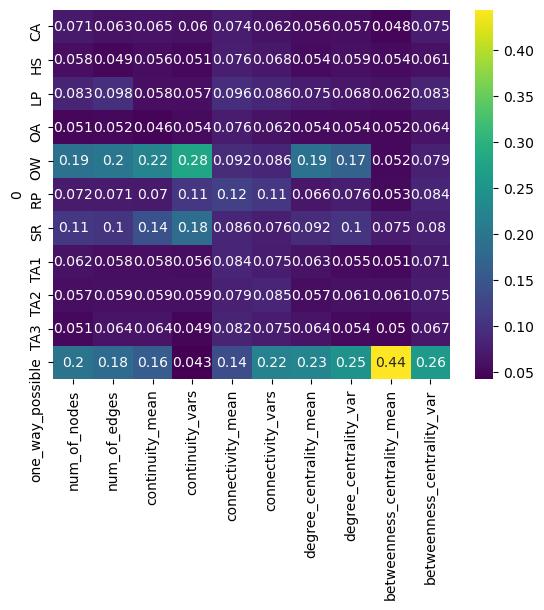

In [12]:
fs = feature_scoring.get_feature_scores_all(experiments, outcomes)
sns.heatmap(fs, cmap="viridis", annot=True)

In [27]:
df = pd.DataFrame(outcomes['num_of_edges'])

In [28]:
df.describe()

,0
count,140.00000
mean,3790.40000
std,596.03196
min,2561.00000
25%,3340.00000
50%,3684.00000
75%,4156.25000
max,5620.00000


## Scenario analysis

In [29]:
x = experiments
y = outcomes["num_of_edges"] > 	4156
prim_alg = prim.Prim(x, y, threshold=0.6)
box1 = prim_alg.find_box()

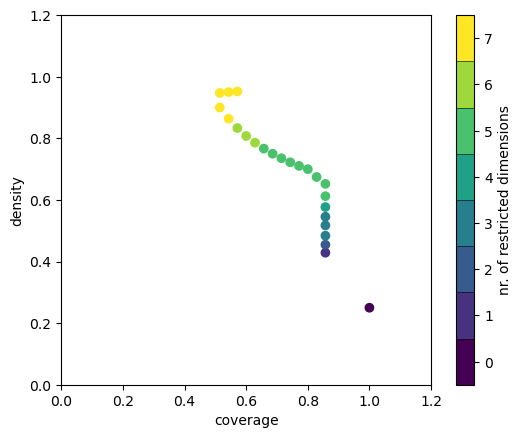

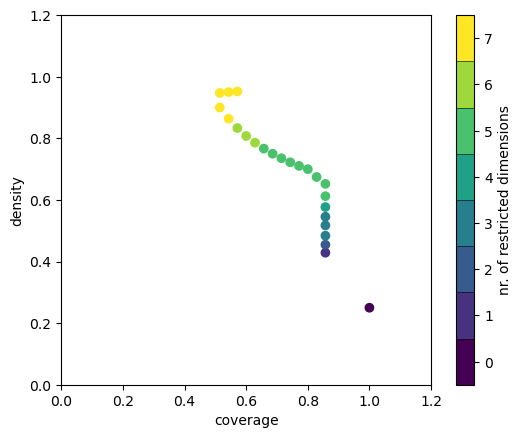

In [30]:
box1.show_tradeoff()

In [31]:
box_num = 20

coverage    0.514286
density          0.9
id                20
mass        0.142857
mean             0.9
res_dim            7
Name: 20, dtype: object

                    box 20            \
                       min       max   
one_way_possible   {False}   {False}   
SR                0.600087  0.998202   
OW                0.692987  1.997547   
CA                1.163453  1.999088   
LP                0.612868  0.975683   
TA1               1.015927  1.298876   
OA                1.236202  1.794912   

                                                             
                                                  qp values  
one_way_possible              [0.0010872092236708043, -1.0]  
SR                              [0.09126043246487825, -1.0]  
OW                              [0.26795043976145494, -1.0]  
CA                               [0.2985805143449822, -1.0]  
LP                [0.2985805143449822, 0.47397071206860375]  
TA1                             [0.44039036159477485, 

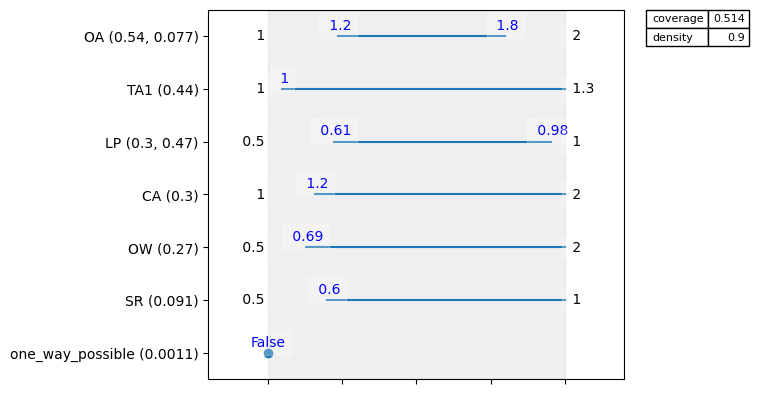

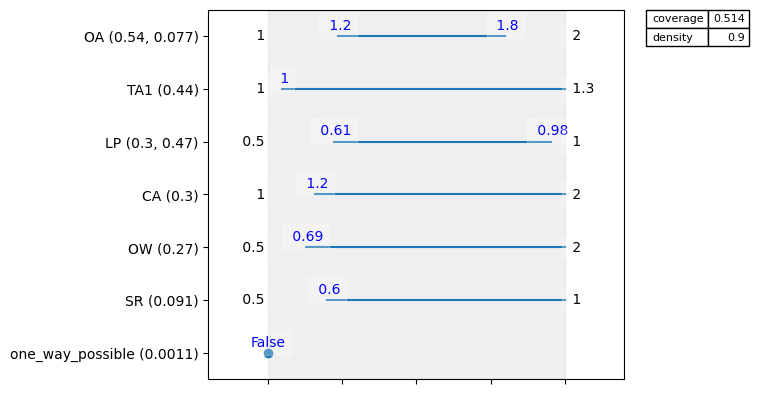

In [32]:
box1.inspect(box_num)
box1.inspect(box_num, style="graph")

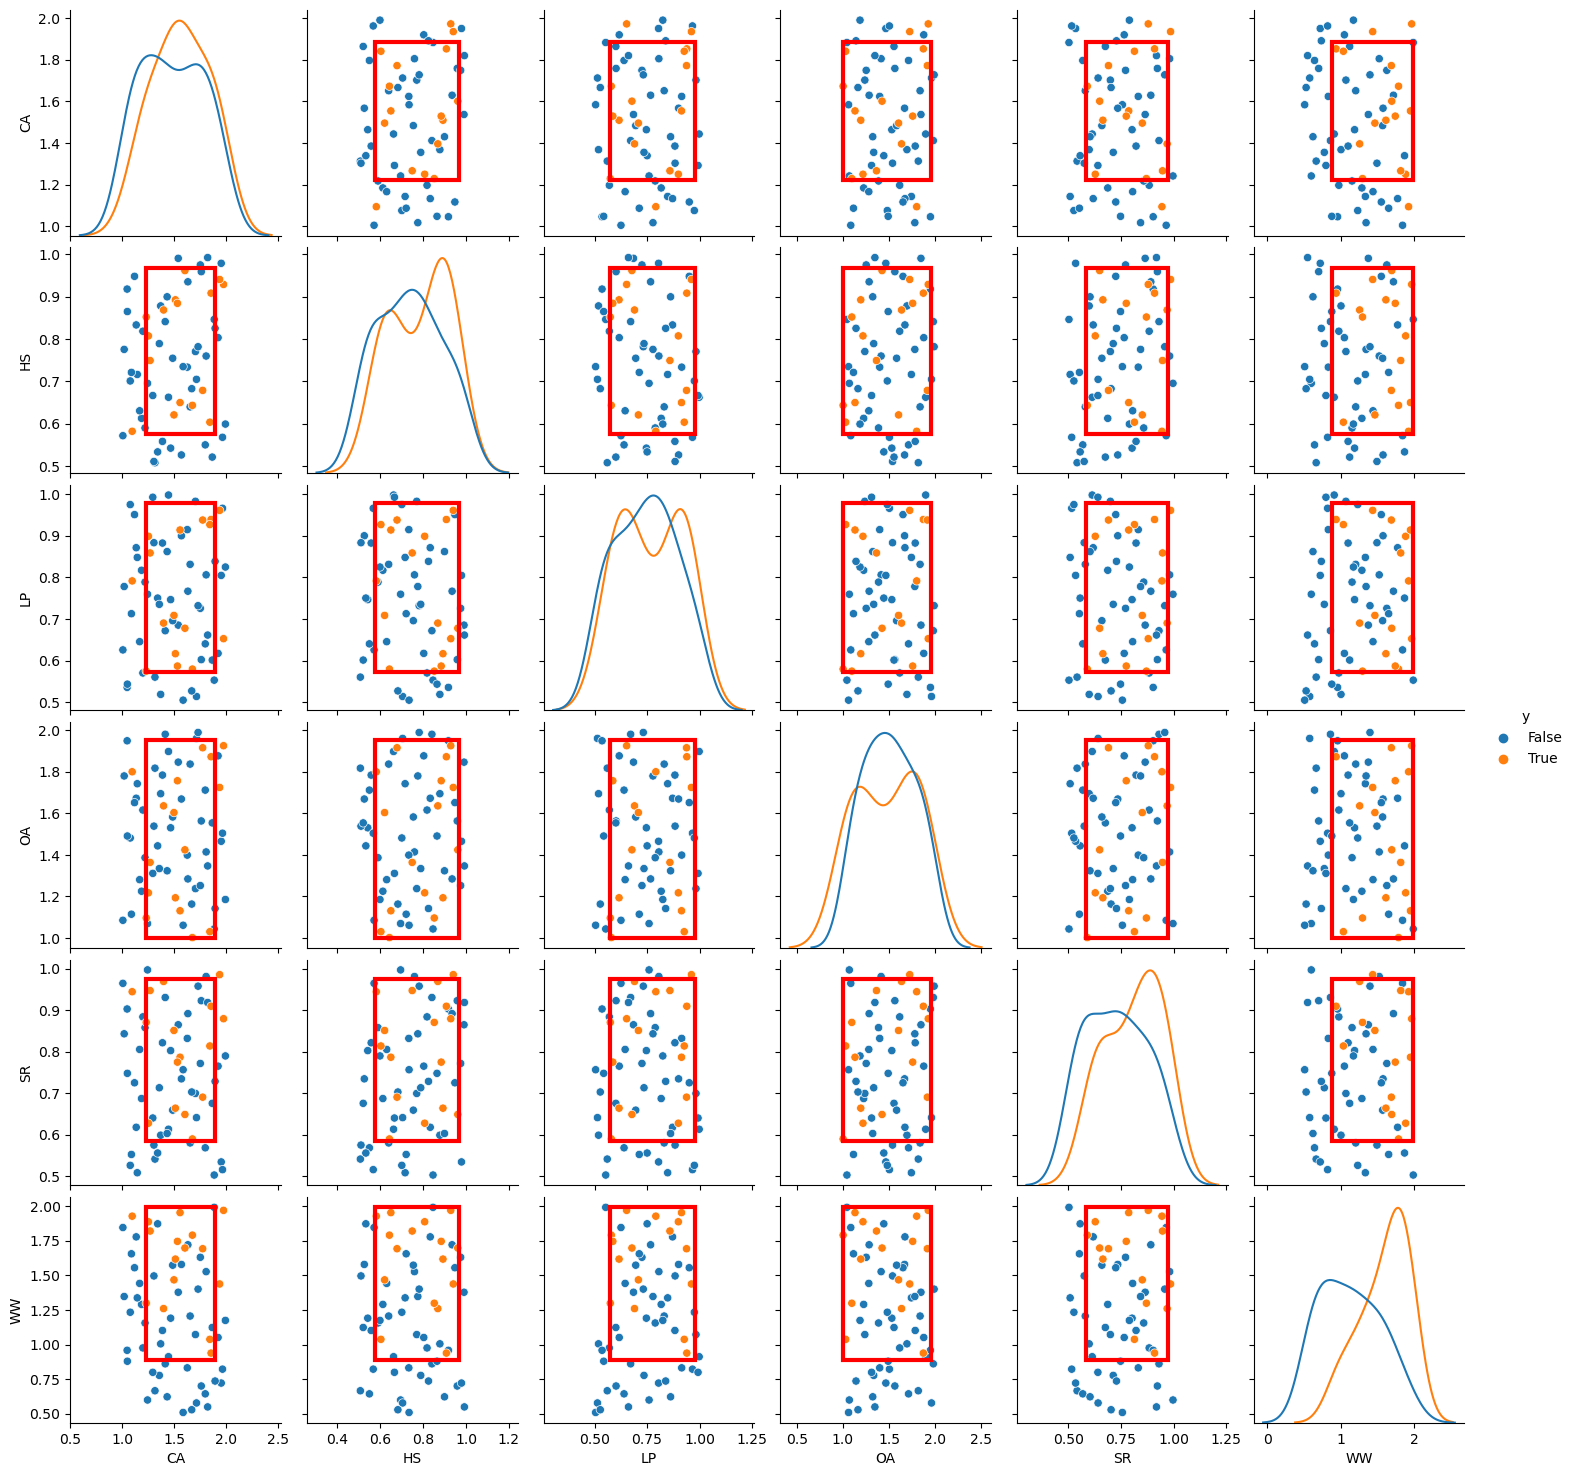

In [87]:
box1.show_pairs_scatter(box_num)

## Sobol indices -> werkt alleen als number of experiments = n^2

In [40]:
uncertainties = [
        RealParameter("CA", 1, 2),
        RealParameter("OA", 1, 2),
        RealParameter("LP", 0.5, 1),
        RealParameter("RP", 0.5, 2),
        RealParameter("WW", 0.5, 2),
        RealParameter("HS", 0.5, 1),
        RealParameter("SR", 0.5, 1),
        RealParameter("TA", 1, 2),
    ]

In [41]:
problem = get_SALib_problem(uncertainties)
Si = sobol.analyze(problem, outcomes["num_of_nodes"], calc_second_order=True, print_to_console=False)

RuntimeError: 
        Incorrect number of samples in model output file.
        Confirm that calc_second_order matches option used during sampling.